In [1]:
#import libraries & modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing necessary packages 
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#importing statsmodel 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#importing scikit learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE, make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#miscellaneous libraries
from datetime import datetime
import warnings
from math import sqrt
from collections import Counter

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.style.use('ggplot')
%matplotlib inline

## Zillow Data

### Median home value from Kaggle

In [2]:
#https://www.kaggle.com/datasets/paultimothymooney/zillow-house-price-data
sale_price = pd.read_csv(r'data\Sale_Prices_City.csv')
sale_price

,Unnamed: 0,RegionID,RegionName,StateName,SizeRank,2015-10,2015-11,2015-12,2016-01,2016-02,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
0,12,25290,Jacksonville,Florida,13,98900.0,98700.0,98900.0,100100.0,102100.0,...,141900,146300,147400,153300,156700,164300,171000,173000,172500,170600.0
1,20,13121,Orlando,Florida,21,169900.0,172800.0,174700.0,176700.0,176400.0,...,239900,241000,238700,239100,240100,244200,244900,241900,241500,243600.0
2,38,12700,Miami,Florida,39,286500.0,291800.0,292100.0,289200.0,291800.0,...,308300,307300,309500,316500,318700,321700,323600,320400,326100,333500.0
3,53,41176,Tampa,Florida,54,158400.0,161400.0,157800.0,167800.0,168500.0,...,229800,227600,219900,220700,222100,229000,228400,234000,232800,240500.0
4,71,19533,Naples,Florida,72,275100.0,281300.0,287600.0,297600.0,290800.0,...,310700,309000,310500,313000,319500,319700,323100,320600,322800,321800.0
5,73,47945,Tallahassee,Florida,74,155400.0,150300.0,143700.0,137000.0,142100.0,...,177400,180500,183400,183300,184500,181900,184900,182400,183000,184400.0
6,85,25104,Hialeah,Florida,86,164700.0,163400.0,172300.0,184100.0,194000.0,...,256400,242700,245700,249200,260700,257100,252600,258700,260200,271800.0
7,88,26922,Saint Petersburg,Florida,89,132600.0,135600.0,142600.0,146600.0,147200.0,...,200300,208900,211100,215900,207900,210400,206500,208700,212400,216700.0
8,89,53856,Pensacola,Florida,90,103300.0,104400.0,110600.0,116900.0,118700.0,...,154000,160600,157200,155000,147700,150600,151700,154700,157100,153300.0
9,99,20362,Sarasota,Florida,100,208200.0,211400.0,216900.0,224600.0,224600.0,...,254000,254000,251400,253600,257100,259000,260000,256700,263500,259200.0


In [3]:
sale_price.describe()

,Unnamed: 0,RegionID,SizeRank,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
count,277.000000,277.000000,277.000000,241.000000,242.000000,243.000000,244.000000,246.000000,246.000000,250.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,275.000000
mean,1710.162455,49900.407942,1711.162455,198563.070539,199991.322314,200251.851852,202002.868852,204415.447154,206597.967480,208918.000000,...,257993.140794,259711.913357,260098.916968,260532.490975,260020.216606,260424.187726,260930.685921,261627.436823,263507.942238,266165.090909
std,1150.529906,72044.066921,1150.529906,97737.848804,99673.810987,98943.483047,98137.153710,97406.844693,98323.529042,99168.694232,...,113510.450214,114852.890638,112375.649950,110002.320588,107689.770597,106502.313167,109681.488291,110099.117259,112901.764767,113817.769976
min,12.000000,3614.000000,13.000000,28800.000000,30200.000000,31600.000000,30100.000000,30900.000000,30600.000000,33600.000000,...,52900.000000,53900.000000,50300.000000,47200.000000,44900.000000,48500.000000,50600.000000,54200.000000,52700.000000,53900.000000
25%,690.000000,17312.000000,691.000000,135200.000000,135725.000000,137000.000000,140050.000000,144075.000000,146075.000000,145725.000000,...,183200.000000,186200.000000,187600.000000,187700.000000,189000.000000,193700.000000,192200.000000,191900.000000,192500.000000,193550.000000
50%,1586.000000,30527.000000,1587.000000,175600.000000,175550.000000,174200.000000,176250.000000,176650.000000,179700.000000,180350.000000,...,234700.000000,235400.000000,233200.000000,233200.000000,235300.000000,236500.000000,234600.000000,233400.000000,237500.000000,238700.000000
75%,2714.000000,47954.000000,2715.000000,233700.000000,233375.000000,234600.000000,238750.000000,238875.000000,244550.000000,248675.000000,...,290100.000000,295100.000000,298400.000000,306900.000000,302500.000000,304200.000000,303100.000000,301400.000000,301900.000000,302050.000000
max,3722.000000,397310.000000,3723.000000,661100.000000,768100.000000,770500.000000,727600.000000,630800.000000,617800.000000,647600.000000,...,854200.000000,836600.000000,799000.000000,707500.000000,669700.000000,673200.000000,754400.000000,790300.000000,803800.000000,871900.000000


percentage = 125% 4 months before the hurricane and 4 month after the hurricane 
Hurricane Matthew 
Before 6/2016 After 2/2017

In [4]:
#10% increase based on Q3 
percent = (sale_price['2017-02'] - sale_price['2016-06'])/sale_price['2016-06']*100
percent.describe()

count    251.000000
mean       6.220199
std        7.938916
min      -15.140415
25%        1.882511
50%        5.831019
75%        9.626426
max       42.339008
dtype: float64

Just zillow 
-create a dataframe from all of the hurricane data that has target variable (percent increase and yes or no), value of homes 4 months before hurricane, city names, which hurricane, and size ranks

-use statsmodel or scikit learn to do logistic regression on categorical column 4 month before the hurricane (predictnig the value)

## Data Exploration

In [5]:
#opening the dataset to create a dataframe for logistic regression 
df = pd.read_csv(r'data\Sale_Prices_City.csv')
df.head()

,Unnamed: 0,RegionID,RegionName,StateName,SizeRank,2015-10,2015-11,2015-12,2016-01,2016-02,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
0,12,25290,Jacksonville,Florida,13,98900.0,98700.0,98900.0,100100.0,102100.0,...,141900,146300,147400,153300,156700,164300,171000,173000,172500,170600.0
1,20,13121,Orlando,Florida,21,169900.0,172800.0,174700.0,176700.0,176400.0,...,239900,241000,238700,239100,240100,244200,244900,241900,241500,243600.0
2,38,12700,Miami,Florida,39,286500.0,291800.0,292100.0,289200.0,291800.0,...,308300,307300,309500,316500,318700,321700,323600,320400,326100,333500.0
3,53,41176,Tampa,Florida,54,158400.0,161400.0,157800.0,167800.0,168500.0,...,229800,227600,219900,220700,222100,229000,228400,234000,232800,240500.0
4,71,19533,Naples,Florida,72,275100.0,281300.0,287600.0,297600.0,290800.0,...,310700,309000,310500,313000,319500,319700,323100,320600,322800,321800.0


## Data Scrubbing

In [6]:
#Renaming columns 4 months before and after each hurricane
#These values will be used to do logistic regression
#Matthew (10/06-08/2016): Before 2016-06 After 2017-02
df['BMatthew'] = df['2016-06']
df['AMatthew'] = df['2017-02']

#Irma (09/10-11/2017): Before 2017-05 After 2018-01
df['BIrma'] = df['2017-05']
df['AIrma'] = df['2018-01']

#Michael (10/09-11/2018): Before 2018-06 After 2019-02 
df['BMichael'] = df['2018-06']
df['AMichael'] = df['2019-02']

#dropping unnecessary columns 
#droppping the rest of the value columns
df = df.loc[:, ~df.columns.str.startswith('2')]

#dropping unnamed: 0 and regionID because they are unique identifiers
#dropping StateName because Florida is the only state being worked with
df.drop(['Unnamed: 0','RegionID', 'StateName'], axis=1, inplace=True)

#Checking it out
df.head()

,RegionName,SizeRank,BMatthew,AMatthew,BIrma,AIrma,BMichael,AMichael
0,Jacksonville,13,111700.0,128500.0,129200.0,133900.0,140700,146300
1,Orlando,21,179800.0,191400.0,196000.0,213000.0,234800,241000
2,Miami,39,286300.0,301100.0,304100.0,312900.0,315500,307300
3,Tampa,54,187300.0,187500.0,185300.0,205100.0,211600,227600
4,Naples,72,283400.0,292600.0,299600.0,295500.0,311500,309000


## Data Exploration 

Let's get an idea of what home value increase looks like from 4 months before and after the hurricanes. This will inform the cutoff value we use when modeling. Our Q3 value is just about 10% for all three hurricanes, so this will be the value used for cutoff.  

In [7]:
#percent = (after - before/before)*100

#finding percent change for Hurricane Matthew
df['percent_Ma'] = (df['AMatthew'] - df['BMatthew'])/df['BMatthew']*100
#finding percent change for Hurricane Irma 
df['percent_I'] = (df['AIrma'] - df['BIrma'])/df['BIrma']*100
#finding percent change for Hurricane Michael
df['percent_Mi'] = (df['AMichael'] - df['BMichael'])/df['BMichael']*100

#Q3 ~10% 
df.describe()

,SizeRank,BMatthew,AMatthew,BIrma,AIrma,BMichael,AMichael,percent_Ma,percent_I,percent_Mi
count,277.000000,251.000000,261.000000,263.000000,275.000000,277.000000,277.000000,251.000000,263.000000,277.000000
mean,1711.162455,212572.908367,221446.360153,226003.041825,242752.727273,248109.386282,259711.913357,6.220199,6.735533,4.991457
std,1150.529906,100618.944852,101927.079686,101120.988254,106815.909335,107279.141772,114852.890638,7.938916,7.381315,8.394314
min,13.000000,34100.000000,35600.000000,39600.000000,42200.000000,42400.000000,53900.000000,-15.140415,-21.457404,-19.028340
25%,691.000000,147050.000000,158700.000000,162000.000000,171700.000000,176200.000000,186200.000000,1.882511,3.158226,0.582411
50%,1587.000000,183900.000000,191700.000000,196000.000000,214500.000000,222800.000000,235400.000000,5.831019,6.796117,4.819945
75%,2715.000000,250750.000000,258300.000000,263000.000000,283250.000000,289200.000000,295100.000000,9.626426,10.464757,9.529412
max,3723.000000,669500.000000,722000.000000,670700.000000,691300.000000,735400.000000,836600.000000,42.339008,28.202368,41.868512


## Data Engineering

Using the 10% cutoff value a column will be engineered stating if 'True' there was a 10% of more increase in value, or 'False' there was less than a 10% increase in value. 

In [8]:
df['boolean_Ma'] = np.where(df['percent_Ma'] >= 10, True, False)
df['boolean_Mi'] = np.where(df['percent_Mi'] >= 10, True, False)
df['boolean_I'] = np.where(df['percent_I'] >= 10, True, False)


In [9]:
df = df[['RegionName', 'SizeRank', 
         'BMatthew', 'AMatthew', 'percent_Ma', 'boolean_Ma',
         'BIrma', 'AIrma', 'percent_I', 'boolean_I',
         'BMichael', 'AMichael', 'percent_Mi', 'boolean_Mi']]
df.head()

,RegionName,SizeRank,BMatthew,AMatthew,percent_Ma,boolean_Ma,BIrma,AIrma,percent_I,boolean_I,BMichael,AMichael,percent_Mi,boolean_Mi
0,Jacksonville,13,111700.0,128500.0,15.040286,True,129200.0,133900.0,3.637771,False,140700,146300,3.980100,False
1,Orlando,21,179800.0,191400.0,6.451613,False,196000.0,213000.0,8.673469,False,234800,241000,2.640545,False
2,Miami,39,286300.0,301100.0,5.169403,False,304100.0,312900.0,2.893785,False,315500,307300,-2.599049,False
3,Tampa,54,187300.0,187500.0,0.106781,False,185300.0,205100.0,10.685375,True,211600,227600,7.561437,False
4,Naples,72,283400.0,292600.0,3.246295,False,299600.0,295500.0,-1.368491,False,311500,309000,-0.802568,False


## Modeling

## NOAA Data 
Average wind speed (AWND)  
Peak gust time (PGTM)  
Direction of fastest 2-minute wind (WDF2) (in degrees)   
Direction of fastest 5-second wind (WDF5) (in degrees)            
Fastest 2-minute wind speed (WSF2) (in meters per second)       
Fastest 5-second wind speed (WSF5) (in meter per second)
24-hour wind movement (km or miles as per user preference, miles on Daily Form pdf file) (WDMV)   
Weather types (WT**)   


(https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)

### Hurricane Matthew (2016)

In [10]:
#Hurricane Matthew data 
#From NOAA 
matthew = pd.read_csv('data/Matthew.csv')
matthew.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PGTM,WDF2,WDF5,WDMV,WSF2,WSF5,...,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11
count,1718.000000,1718.000000,1704.000000,137.000000,27.000000,138.000000,138.000000,6.000000,138.000000,138.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,1.0
mean,28.298730,-82.117390,17.690669,13.289124,1182.407407,231.014493,230.434783,135.750000,24.634058,33.971014,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
std,1.623127,1.654518,16.477241,5.592203,543.787590,117.773071,119.621481,86.570474,9.595502,13.430150,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
min,24.550659,-87.467244,0.000000,4.920000,36.000000,10.000000,10.000000,0.000000,10.100000,13.000000,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
25%,27.115428,-82.523382,4.600000,8.720000,783.500000,117.500000,80.000000,100.825000,17.000000,24.200000,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
50%,28.228879,-81.821880,11.900000,11.860000,1339.000000,280.000000,280.000000,147.250000,22.450000,31.100000,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
75%,29.765200,-81.030000,27.400000,15.880000,1448.500000,310.000000,310.000000,169.900000,29.100000,38.900000,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
max,30.953800,-80.034979,85.000000,33.330000,2243.000000,360.000000,360.000000,257.200000,55.000000,74.000000,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0


In [11]:
matthew.isna().sum()

STATION         0
LATITUDE        0
LONGITUDE       0
ELEVATION      14
DATE            0
AWND         1581
PGTM         1691
WDF2         1580
WDF5         1580
WDMV         1712
WSF2         1580
WSF5         1580
WT01         1673
WT02         1718
WT03         1710
WT04         1718
WT05         1718
WT06         1718
WT07         1718
WT08         1702
WT09         1718
WT10         1718
WT11         1717
dtype: int64

In [12]:
#dropping rows that have missing value for average wind speed 
matthew = matthew.dropna(subset=['AWND'])
matthew

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,WDF2,WDF5,WDMV,...,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11
49,USW00012897,26.15498,-81.77514,2.0,10/6/2016,10.51,NaN,20.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
52,USW00012896,24.72624,-81.04770,0.9,10/6/2016,13.87,NaN,320.0,320.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,USW00012895,27.49816,-80.37626,5.7,10/6/2016,13.87,NaN,330.0,340.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
54,USW00012894,26.53805,-81.75674,8.2,10/6/2016,11.18,NaN,40.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,USW00073805,30.34869,-85.78835,17.1,10/6/2016,10.74,NaN,30.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,USW00063871,30.84315,-85.60431,31.2,10/6/2016,6.93,1234.0,50.0,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,USW00053847,30.69729,-87.02073,49.9,10/6/2016,8.72,1113.0,70.0,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,USW00053853,30.39333,-86.46738,5.4,10/6/2016,8.50,557.0,60.0,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,USW00053860,30.33708,-81.51277,11.9,10/6/2016,16.78,NaN,20.0,40.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,USW00092805,26.24636,-80.11105,4.6,10/6/2016,21.92,NaN,270.0,270.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


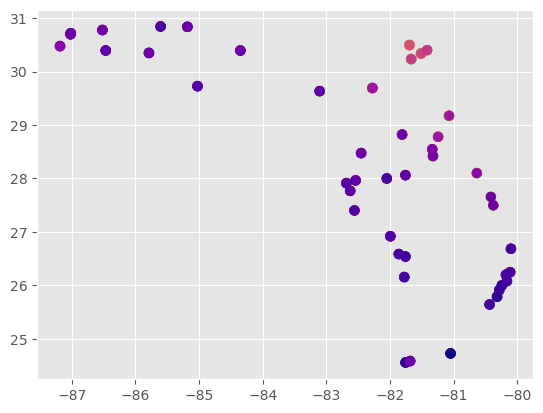

In [13]:
#plotting longitude and latitude and using Fastest 5-second wind speed (WSF5) as dot value 
#pinker values represent higher wind speeds
plt.scatter(x=matthew['LONGITUDE'], y=matthew['LATITUDE'], s=50, c=matthew['WSF5'], cmap='plasma')
plt.show()


## Hurricane Irma (2017)

In [14]:
#Hurricane Irma data 
#From NOAA 
irma = pd.read_csv('data/Irma.csv')
irma.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,WDF2,WDF5,WDMV,...,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11
0,USW00012834,29.173510,-81.071850,7.9,9/9/2017,17.22,NaN,60.0,60.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1FLPK0037,27.952372,-82.042413,36.3,9/9/2017,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012833,29.633330,-83.105280,11.6,9/9/2017,12.97,NaN,30.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00012832,29.726810,-85.024810,5.5,9/9/2017,12.97,NaN,40.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1FLPK0035,27.702740,-81.589030,48.2,9/9/2017,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
irma.isna().sum()

STATION         0
LATITUDE        0
LONGITUDE       0
ELEVATION      11
DATE            0
AWND         1032
PGTM         1111
WDF2         1026
WDF5         1026
WDMV         1137
WSF2         1026
WSF5         1026
WT01         1072
WT02         1131
WT03         1107
WT04         1137
WT05         1137
WT06         1137
WT07         1137
WT08         1126
WT09         1137
WT10         1137
WT11         1129
dtype: int64

In [16]:
#dropping rows that have missing value for average wind speed 
irma = irma.dropna(subset=['AWND'])
irma.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PGTM,WDF2,WDF5,WDMV,WSF2,WSF5,...,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11
count,105.000000,105.000000,105.000000,105.000000,22.000000,104.000000,104.000000,0.0,104.000000,104.000000,...,6.0,21.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
mean,28.449504,-82.420215,15.914286,20.937429,1245.181818,122.307692,127.692308,NaN,39.488462,54.694231,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
std,1.692573,2.087988,16.621594,7.562738,717.021660,102.542729,109.511100,NaN,13.653616,18.086324,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
min,24.557060,-87.185750,0.100000,7.610000,0.000000,10.000000,10.000000,NaN,17.000000,25.900000,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
25%,26.918470,-82.685550,3.500000,15.660000,865.750000,57.500000,50.000000,NaN,28.000000,38.675000,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
50%,28.418220,-81.775140,7.200000,19.910000,1254.500000,75.000000,75.000000,NaN,38.450000,55.000000,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
75%,30.233330,-81.071850,27.100000,24.380000,1771.750000,140.000000,162.500000,NaN,51.275000,70.000000,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
max,30.843150,-80.099180,60.700000,40.710000,2335.000000,360.000000,360.000000,NaN,74.000000,91.000000,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [17]:
irma['STATION'].unique()

array(['USW00012834', 'USW00012833', 'USW00012832', 'USW00012839',
       'USW00012838', 'USW00012836', 'USW00012835', 'USW00012844',
       'USW00012843', 'USW00012842', 'USW00012841', 'USW00012812',
       'USW00093841', 'USW00012819', 'USW00012818', 'USW00012816',
       'USW00012815', 'USW00093837', 'USW00012876', 'USW00012873',
       'USW00012871', 'USW00012888', 'USW00012885', 'USW00012883',
       'USW00012882', 'USW00012849', 'USW00093805', 'USW00012854',
       'USW00012897', 'USW00012895', 'USW00012894', 'USW00073805',
       'USW00063871', 'USW00053847', 'USW00053853', 'USW00053860',
       'USW00092805', 'USW00092806', 'USW00092809', 'USW00013889',
       'USW00013884', 'USW00003818', 'USW00013899', 'USW00003853'],
      dtype=object)

In [18]:
irma.replace(['USW00012834', 'USW00012833', 'USW00012832', 'USW00012839',
], [4, 3, 2, 1])

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,WDF2,WDF5,WDMV,...,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11
0,4,29.17351,-81.07185,7.9,9/9/2017,17.22,NaN,60.0,60.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,29.63333,-83.10528,11.6,9/9/2017,12.97,NaN,30.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,29.72681,-85.02481,5.5,9/9/2017,12.97,NaN,40.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,25.78805,-80.31694,1.4,9/9/2017,19.46,NaN,90.0,90.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USW00012838,28.09969,-80.63560,6.7,9/9/2017,21.70,NaN,70.0,70.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USW00012836,24.55706,-81.75539,0.3,9/9/2017,26.17,NaN,30.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,USW00012835,26.58495,-81.86146,3.8,9/9/2017,16.78,NaN,60.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,USW00012844,26.68510,-80.09918,3.5,9/9/2017,20.80,NaN,110.0,50.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,USW00012843,27.65530,-80.41425,5.7,9/9/2017,16.11,NaN,60.0,50.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16,USW00012842,27.96331,-82.54000,1.8,9/9/2017,12.30,NaN,40.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


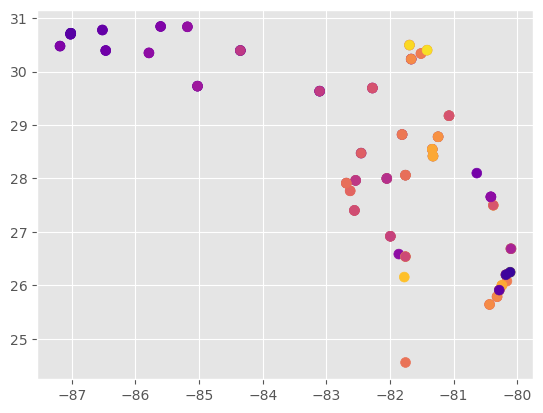

In [19]:
#plotting longitude and latitude and using Fastest 5-second wind speed (WSF5) as dot value 
#yellow values represent higher wind speeds 
plt.scatter(x=irma['LONGITUDE'], y=irma['LATITUDE'], s=50, c=irma['WSF5'], cmap='plasma')
plt.show()

### Hurricane Michael (2018)

In [20]:
#Hurricane Michael data 
#From NOAA 
michael = pd.read_csv('data/Michael.csv')

In [21]:
michael.isna().sum()

STATION         0
LATITUDE        0
LONGITUDE       0
ELEVATION      13
DATE            0
AWND         1971
PGTM         2086
WDF2         1974
WDF5         1975
WDMV         2103
WSF2         1974
WSF5         1975
WT01         2045
WT02         2108
WT03         2063
WT04         2111
WT05         2111
WT06         2111
WT08         2099
WT09         2111
WT10         2111
WT11         2111
dtype: int64

In [22]:
#dropping rows that have missing value for average wind speed 
michael = michael.dropna(subset=['AWND'])
michael.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PGTM,WDF2,WDF5,WDMV,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT10,WT11
count,140.000000,140.000000,140.000000,140.000000,25.000000,137.000000,136.000000,0.0,137.000000,136.000000,65.0,3.0,46.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
mean,28.163582,-82.169312,14.125714,11.574286,1190.440000,184.160584,174.117647,NaN,22.775182,30.840441,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
std,1.864950,1.919758,16.060517,4.245917,631.550478,73.340888,69.596409,NaN,7.134885,9.949430,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
min,24.557060,-87.185750,0.100000,0.000000,2.000000,60.000000,10.000000,NaN,10.100000,15.000000,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
25%,26.538050,-82.544657,2.000000,8.950000,842.000000,130.000000,120.000000,NaN,18.100000,25.100000,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
50%,28.099690,-81.755390,6.100000,11.630000,1118.000000,180.000000,170.000000,NaN,21.900000,29.100000,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
75%,30.027710,-81.047700,20.800000,13.870000,1520.000000,240.000000,210.000000,NaN,25.100000,34.275000,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
max,30.836960,-80.099180,60.700000,29.750000,2343.000000,360.000000,360.000000,NaN,63.100000,89.000000,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


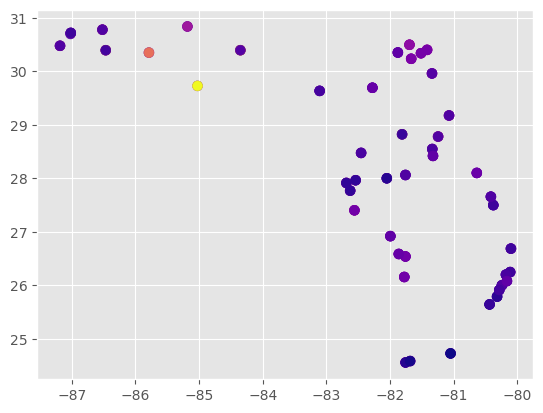

In [23]:
#plotting longitude and latitude and using Fastest 5-second wind speed (WSF5) as dot value 
#yellow values represent higher wind speeds 
plt.scatter(x=michael['LONGITUDE'], y=michael['LATITUDE'], s=50, c=michael['WSF5'], cmap='plasma')
plt.show()

#### Bay County Data 
Bay County was the primary area struck by hurricane Michael

In [24]:
#Bay County Data from Hurricane Michael 
#Taken from NOAA

baycounty = pd.read_csv(r'data\Bay_County.csv')
baycounty

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,...,WSF5,WSF5_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/6/2018,3.58,",,W",NaN,NaN,...,19.0,",,W",1.0,",,W",NaN,NaN,NaN,NaN,NaN,NaN
1,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/7/2018,7.16,",,W",NaN,NaN,...,25.9,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/8/2018,10.29,",,W",NaN,NaN,...,29.1,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/9/2018,11.18,",,W",NaN,NaN,...,29.1,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/10/2018,19.46,",,W",NaN,NaN,...,62.0,",,W",1.0,",,W",NaN,NaN,1.0,",,W",NaN,NaN
5,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/14/2018,7.38,",,W",NaN,NaN,...,18.1,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/15/2018,7.16,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,USW00073805,"NORTHWEST FLORIDA BEACHES INTERNATIONAL AIRPORT, FL US",30.34869,-85.78835,17.1,10/16/2018,4.92,",,W",NaN,NaN,...,NaN,NaN,1.0,",,W",1.0,",,W",NaN,NaN,NaN,NaN


In [25]:
#dropping rows that have missing value for average wind speed 
baycounty = baycounty.dropna(subset=['AWND'])
baycounty.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PGTM,PGTM_ATTRIBUTES,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08,WT08_ATTRIBUTES
count,8.00000,8.000000e+00,8.000000e+00,8.000000,0.0,0.0,8.000000,6.000000,8.000000,6.000000,3.0,1.0,1.0,0.0,0.0
mean,30.34869,-8.578835e+01,1.710000e+01,8.891250,NaN,NaN,163.750000,175.000000,17.037500,30.533333,1.0,1.0,1.0,NaN,NaN
std,0.00000,1.519204e-14,3.798011e-15,4.944721,NaN,NaN,96.204767,132.476413,9.822996,16.145175,0.0,NaN,NaN,NaN,NaN
min,30.34869,-8.578835e+01,1.710000e+01,3.580000,NaN,NaN,60.000000,50.000000,10.100000,18.100000,1.0,1.0,1.0,NaN,NaN
25%,30.34869,-8.578835e+01,1.710000e+01,6.600000,NaN,NaN,87.500000,82.500000,10.100000,20.725000,1.0,1.0,1.0,NaN,NaN
50%,30.34869,-8.578835e+01,1.710000e+01,7.270000,NaN,NaN,160.000000,120.000000,12.550000,27.500000,1.0,1.0,1.0,NaN,NaN
75%,30.34869,-8.578835e+01,1.710000e+01,10.512500,NaN,NaN,195.000000,277.500000,21.225000,29.100000,1.0,1.0,1.0,NaN,NaN
max,30.34869,-8.578835e+01,1.710000e+01,19.460000,NaN,NaN,360.000000,360.000000,38.000000,62.000000,1.0,1.0,1.0,NaN,NaN


### General Hurricane Data 
Hurricane data from 1900 to 2018

In [26]:
storm_data = pd.read_csv(r'data\storm_data_search_results (1).csv')
storm_data

EVENT_ID                         CZ_NAME_STR BEGIN_LOCATION  BEGIN_DATE  \
0     655883             COASTAL FRANKLIN (ZONE)                 09/01/2016   
1     655884              INLAND FRANKLIN (ZONE)                 09/01/2016   
2     655885              COASTAL WAKULLA (ZONE)                 09/01/2016   
3     655886               INLAND WAKULLA (ZONE)                 09/01/2016   
4     655887            COASTAL JEFFERSON (ZONE)                 09/01/2016   
5     655889             INLAND JEFFERSON (ZONE)                 09/01/2016   
6     657382               COASTAL TAYLOR (ZONE)                 09/01/2016   
7     657383                INLAND TAYLOR (ZONE)                 09/01/2016   
8     661501                 INDIAN RIVER (ZONE)                 10/06/2016   
9     661647                      BREVARD (ZONE)                 10/06/2016   
10    661648                      VOLUSIA (ZONE)                 10/06/2016   
11    722003                COASTAL PASCO (ZONE)                 09/08/2017   
12    722914              MAINLAND MONROE (ZONE)                 09/09/2017   
13    723287  FAR SOUTH MIAMI-DADE COUNTY (ZONE)                 09/09/2017   
14    723286            INLAND MIAMI-DADE (ZONE)                 09/09/2017   
15    723457           MONROE/MIDDLE KEYS (ZONE)                 09/09/2017   
16    723459            MONROE/UPPER KEYS (ZONE)                 09/09/2017   
17    723450            MONROE/LOWER KEYS (ZONE)                 09/09/2017   
18    722895       COASTAL COLLIER COUNTY (ZONE)                 09/09/2017   
19    723255        INLAND COLLIER COUNTY (ZONE)                 09/09/2017   
20    721738             INLAND CHARLOTTE (ZONE)                 09/10/2017   
21    721736                   INLAND LEE (ZONE)                 09/10/2017   
22    721768                      DE SOTO (ZONE)                 09/10/2017   
23    721739                    HIGHLANDS (ZONE)                 09/10/2017   
24    721737            COASTAL CHARLOTTE (ZONE)                 09/10/2017   
25    721735                  COASTAL LEE (ZONE)                 09/10/2017   
26    721803              INLAND SARASOTA (ZONE)                 09/10/2017   
27    721769                       HARDEE (ZONE)                 09/10/2017   
28    721791             COASTAL SARASOTA (ZONE)                 09/10/2017   
29    721815              COASTAL MANATEE (ZONE)                 09/10/2017   
30    721812               INLAND MANATEE (ZONE)                 09/10/2017   
31    721819                         POLK (ZONE)                 09/10/2017   
32    721999          INLAND HILLSBOROUGH (ZONE)                 09/10/2017   
33    721998         COASTAL HILLSBOROUGH (ZONE)                 09/10/2017   
34    722000                     PINELLAS (ZONE)                 09/10/2017   
35    790380                         LEON (ZONE)                 10/10/2018   
36    790381                      GADSDEN (ZONE)                 10/10/2018   
37    790382                      LIBERTY (ZONE)                 10/10/2018   
38    790383                      CALHOUN (ZONE)                 10/10/2018   
39    790384                      JACKSON (ZONE)                 10/10/2018   
40    790385                   WASHINGTON (ZONE)                 10/10/2018   
41    789475                  COASTAL BAY (ZONE)                 10/10/2018   
42    790373                   INLAND BAY (ZONE)                 10/10/2018   
43    790374                 COASTAL GULF (ZONE)                 10/10/2018   
44    790375                  INLAND GULF (ZONE)                 10/10/2018   
45    790376              INLAND FRANKLIN (ZONE)                 10/10/2018   
46    790377             COASTAL FRANKLIN (ZONE)                 10/10/2018   
47    790378               INLAND WAKULLA (ZONE)                 10/10/2018   
48    790379              COASTAL WAKULLA (ZONE)                 10/10/2018   

    BEGIN_TIME           EVENT_TYPE MAGNITUDE TOR_F_S

### NOAA API

In [27]:
#needed to make web requests
import requests
#store the data we get as a dataframe
import pandas as pd
#convert the response as a strcuctured json
import json
#mathematical operations on lists
import numpy as np
#parse the datetimes we get from NOAA
from datetime import datetime
#add the access token you got from NOAA
Token = 'mrMETAXWcTJKLduCSeekSAMcBlDEfGYZ'
#MIAMI LAKES 2.1 N, FL US
#https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1FLMD0006/detail
station_id = 'GHCND:US1FLFR0002'

In [28]:
#https://towardsdatascience.com/getting-weather-data-in-3-easy-steps-8dc10cc5c859
#initialize lists to store data


#for each year from 2016-2019 ...
for year in range(2016, 2019):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=AWND&limit=1000&stationid=GHCND:US1FLFR0002&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)


working on year 2016
working on year 2017
working on year 2018


In [29]:
d

{}

In [30]:
dates_temp = []
dates_prcp = []
temps = []
prcp = []
#get all items in the response which are average temperature readings
avg_temps = [item for item in d['results'] if item['datatype']=='AWND']
#get the date field from all average temperature readings
dates_temp += [item['date'] for item in avg_temps]
#get the actual average temperature from all average temperature readings
temps += [item['value'] for item in avg_temps]

KeyError: 'results'

In [ ]:
#https://towardsdatascience.com/getting-weather-data-in-3-easy-steps-8dc10cc5c859
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
prcp = []

#for each year from 2015-2019 ...
#for year in range(2015, 2020):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=AWND&limit=1000&stationid=GHCND:USW00023129&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    #d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='AWND']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]

In [ ]:
#initialize dataframe
#df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
#df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
#df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]

In [ ]:
df_temp.describe()

### Median Sale Price Directly from Zillow 

In [ ]:
#Median Sale Price: The median price at which homes across various geographies were sold.
#https://www.zillow.com/research/data/
median_price = pd.read_csv('data/Metro_median_sale_price_uc_sfrcondo_month.csv')
median_price